# Image Classification with convolutional neural networks

### Details:
> Will use CIFAR10 dataset of images included in keras.
> 10000 images are 32x32x3 (coloured)
> 10 Classes are:
1. plane
2. car
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

In [0]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
keras = tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15736232023833388625
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9450506545742584987
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8868399291235733404
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10857195111
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15788100257168478509
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
from tensorflow.keras.datasets import cifar10
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

In [0]:
from tensorflow.keras.utils import to_categorical

Training data shape:  (50000, 32, 32, 3) (50000, 1)
Testing data shape:  (10000, 32, 32, 3) (10000, 1)
Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : [3]')

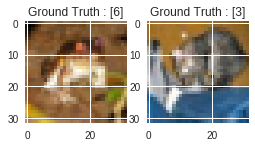

In [5]:
print('Training data shape: ', train_images.shape, train_labels.shape)
print('Testing data shape: ', test_images.shape, test_labels.shape)

classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)

plt.figure(figsize=[4,2])

plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))

plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[0]))

In [0]:
nRows, nCols, nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape=(nRows,nCols,nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [7]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical: ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
def createModel():
  model = Sequential()
  
  model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation='softmax'))
  
  return model

In [9]:
model1 = createModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
__________

In [0]:
batch_size = 256
epochs = 50
model1.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data = (test_data,test_labels_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 22s 431us/step - loss: 2.0294 - acc: 0.2438 - val_loss: 1.7858 - val_acc: 0.3357
Epoch 2/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.7359 - acc: 0.3604 - val_loss: 1.7105 - val_acc: 0.3756
Epoch 3/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.5873 - acc: 0.4217 - val_loss: 1.6327 - val_acc: 0.3990
Epoch 4/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.4890 - acc: 0.4582 - val_loss: 1.4551 - val_acc: 0.4715
Epoch 5/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.4030 - acc: 0.4947 - val_loss: 1.2687 - val_acc: 0.5430
Epoch 6/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.3446 - acc: 0.5153 - val_loss: 1.3328 - val_acc: 0.5137
Epoch 7/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.2890 - acc: 0.5398 - val_loss: 1.

In [0]:
model1.evaluate(test_data, test_labels_one_hot)

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation_loss'])
plt.xlabel("Epochs",)
plt.ylabel("Accuracy")
plt.title("Accuracy Curves")

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
model1.save('ConvNetRecognition300epochs.model')

In [0]:
from google.colab import files
files.download('ConvNetRecognition300epochs.model')

In [0]:
predictions = model1.predict(test_data)

In [0]:
types = {'0':"Plane",
         '1':"Car",
         '2':"Bird",
         '3':"Cat",
         '4':"Deer",
         '5':"Dog",
         '6':"Frog",
         '7':"Horse",
         '8':"Ship",
         '9':"Trucks"
    
    
}  

In [0]:
index = np.random.randint(8000)
plt.imshow(test_data[index])
print("I think this is a(n):  " + types[str(np.argmax(predictions[index]))])
print("This is actually a(n): " + types[str(test_labels[index][0])])

In [0]:
from google.colab import files
import keras

In [0]:
model_file = files.upload()


In [0]:
model1 = keras.models.load_model("ConvNetRecognition50epochs.model")